# FINAL YEAR PROJECT

DATA PRE PROCESSING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")
dataset = pd.read_csv('Combined.csv')
dataset

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22072,YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
22073,YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
22074,ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0
22075,ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,...,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0


In [2]:
dataset = dataset.drop(['Unnamed: 0','Sector'], axis='columns')

In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN,strategy = 'mean')
imputer = imputer.fit(dataset.iloc[:, 0:222])
dataset.iloc[:, 0:222] = imputer.transform(dataset.iloc[:, 0:222])

In [4]:
imputer = SimpleImputer(missing_values=0,strategy = 'mean')
imputer = imputer.fit(dataset.iloc[:, 0:222])
dataset.iloc[:, 0:222] = imputer.transform(dataset.iloc[:, 0:222])

In [5]:
df = dataset.iloc[:, 0:223]  #ALL FEATURES
df2 = dataset.drop('2015 PRICE VAR [%]', axis = 1)
df3 = dataset.iloc[:, 0:223]

In [6]:
X1 = df.iloc[:,:-1]
X2 = df2.iloc[:,:-1]
Y1 = df['Class']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [8]:
#SVC WITH ALL FEATURES

xtrain, xtest, ytrain, y_test_SVC1 = train_test_split(X1, Y1, test_size=0.8)

model = SVC()
model.fit(xtrain, ytrain)

y_pred_SVC1 = model.predict(xtest)


print("Accuracy:", metrics.accuracy_score(y_test_SVC1, y_pred_SVC1))
SVC1 = metrics.accuracy_score(y_test_SVC1, y_pred_SVC1)
print("_______________________________________________________________________")
print(confusion_matrix(y_test_SVC1, y_pred_SVC1))
print("_______________________________________________________________________")
print(classification_report(y_test_SVC1, y_pred_SVC1))

Accuracy: 0.5703770807383083
_______________________________________________________________________
[[1591 6359]
 [1229 8483]]
_______________________________________________________________________
              precision    recall  f1-score   support

           0       0.56      0.20      0.30      7950
           1       0.57      0.87      0.69      9712

    accuracy                           0.57     17662
   macro avg       0.57      0.54      0.49     17662
weighted avg       0.57      0.57      0.51     17662



In [9]:
#SVC WITH ALL FEATURES EXCEPT ONE

xtrain, xtest, ytrain, y_test_SVC2 = train_test_split(X2, Y1, test_size=0.8)

model = SVC()
model.fit(xtrain, ytrain)

y_pred_SVC2 = model.predict(xtest)


print("Accuracy:", metrics.accuracy_score(y_test_SVC2, y_pred_SVC2))
SVC2 = metrics.accuracy_score(y_test_SVC2, y_pred_SVC2)
print("_______________________________________________________________________")
print(confusion_matrix(y_test_SVC2, y_pred_SVC2))
print("_______________________________________________________________________")
print(classification_report(y_test_SVC2, y_pred_SVC2))

Accuracy: 0.550673762880761
_______________________________________________________________________
[[   0 7936]
 [   0 9726]]
_______________________________________________________________________
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7936
           1       0.55      1.00      0.71      9726

    accuracy                           0.55     17662
   macro avg       0.28      0.50      0.36     17662
weighted avg       0.30      0.55      0.39     17662



C:\Users\Shree\.conda\envs\Shree\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shree\.conda\envs\Shree\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shree\.conda\envs\Shree\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
#RF WITH ALL FEATURES

# Split dataset into training set and test set
X_train, X_test, y_train, y_test_RF1 = train_test_split(X1, Y1, test_size=0.8) 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_RF1 = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_RF1, y_pred_RF1))
RF1 = metrics.accuracy_score(y_test_RF1, y_pred_RF1)
print("_______________________________________________________________________")
print(confusion_matrix(y_test_RF1, y_pred_RF1))
print("_______________________________________________________________________")
print(classification_report(y_test_RF1, y_pred_RF1))

Accuracy: 0.9994338127052429
_______________________________________________________________________
[[7920    2]
 [   8 9732]]
_______________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7922
           1       1.00      1.00      1.00      9740

    accuracy                           1.00     17662
   macro avg       1.00      1.00      1.00     17662
weighted avg       1.00      1.00      1.00     17662



In [11]:
#RF WITH ALL FEATURES EXCEPT ONE

# Split dataset into training set and test set
X_train, X_test, y_train, y_test_RF2 = train_test_split(X2, Y1, test_size=0.8) 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_RF2 = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_RF2, y_pred_RF2))
RF2 = metrics.accuracy_score(y_test_RF2, y_pred_RF2)
print("_______________________________________________________________________")
print(confusion_matrix(y_test_RF2, y_pred_RF2))
print("_______________________________________________________________________")
print(classification_report(y_test_RF2, y_pred_RF2))

Accuracy: 0.6063865926848602
_______________________________________________________________________
[[4097 3823]
 [3129 6613]]
_______________________________________________________________________
              precision    recall  f1-score   support

           0       0.57      0.52      0.54      7920
           1       0.63      0.68      0.66      9742

    accuracy                           0.61     17662
   macro avg       0.60      0.60      0.60     17662
weighted avg       0.60      0.61      0.60     17662



In [12]:
#ADA WITH ALL FEATURES

# Split dataset into training set and test set
X_train, X_test, y_train, y_test_ADA1 = train_test_split(X1, Y1, test_size=0.8) 

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ADA1 = ada_model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_ADA1, y_pred_ADA1))
ADA1 = metrics.accuracy_score(y_test_ADA1, y_pred_ADA1)
print("_______________________________________________________________________")
cm = confusion_matrix(y_test_ADA1, y_pred_ADA1)
print(cm)
print("_______________________________________________________________________")
print(classification_report(y_test_ADA1, y_pred_ADA1))

Accuracy: 1.0
_______________________________________________________________________
[[7944    0]
 [   0 9718]]
_______________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7944
           1       1.00      1.00      1.00      9718

    accuracy                           1.00     17662
   macro avg       1.00      1.00      1.00     17662
weighted avg       1.00      1.00      1.00     17662



In [13]:
#ADA WITH ALL FEATURES EXCEPT ONE

# Split dataset into training set and test set
X_train, X_test, y_train, y_test_ADA2 = train_test_split(X2, Y1, test_size=0.8) 

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

y_pred_ADA2 = ada_model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_ADA2, y_pred_ADA2))
ADA2 = metrics.accuracy_score(y_test_ADA2, y_pred_ADA2)
print("_______________________________________________________________________")
cm = confusion_matrix(y_test_ADA2, y_pred_ADA2)
print(cm)
print("_______________________________________________________________________")
print(classification_report(y_test_ADA2, y_pred_ADA2))

Accuracy: 0.589004642735817
_______________________________________________________________________
[[3588 4361]
 [2898 6815]]
_______________________________________________________________________
              precision    recall  f1-score   support

           0       0.55      0.45      0.50      7949
           1       0.61      0.70      0.65      9713

    accuracy                           0.59     17662
   macro avg       0.58      0.58      0.57     17662
weighted avg       0.58      0.59      0.58     17662



RFE

In [14]:
X1 = df3.iloc[:,:-1]
X2 = df2.iloc[:,:-1]
Y = df3['Class']

In [15]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into train and test sets
X_train, X_test, y_train, y_test_RFE1 = train_test_split(X1, Y, test_size=0.8, random_state=42)

# Create a RandomForestClassifier instance
clf = RandomForestClassifier(n_estimators=120)

# Use RFE to perform feature selection
feature_selector = RFE(clf, n_features_to_select=30, verbose=2)
feature_selector.fit(X_train, y_train)

# Get the selected features
selected_features = feature_selector.support_

# Get the feature names
feature_names1 = np.array(X1.columns)[selected_features]

# Print the selected feature names
print(f'Selected features: {", ".join(feature_names1)}')

Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
F

In [16]:
# Use the selected features to train the classifier
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Fit the classifier to the training data
clf.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred_RFE1 = clf.predict(X_test_selected)

# Calculate the accuracy
RFE1 = accuracy_score(y_test_RFE1, y_pred_RFE1)
print("Accuracy:",metrics.accuracy_score(y_test_RFE1, y_pred_RFE1))
print("_______________________________________________________________________")
print(confusion_matrix(y_test_RFE1, y_pred_RFE1))
print("_______________________________________________________________________")
print(classification_report(y_test_RFE1, y_pred_RFE1))

Accuracy: 0.9998867625410486
_______________________________________________________________________
[[7971    1]
 [   1 9689]]
_______________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7972
           1       1.00      1.00      1.00      9690

    accuracy                           1.00     17662
   macro avg       1.00      1.00      1.00     17662
weighted avg       1.00      1.00      1.00     17662



In [17]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import ShuffleSplit, cross_val_score 

# Create a RandomForestClassifier instance
clf = RandomForestClassifier(n_estimators=120)
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.8, random_state=42)

# Use RFECV to perform feature selection with cross-validation
feature_selector = RFECV(clf, cv=shuffle_split, scoring='accuracy', verbose=2)
feature_selector.fit(X1, Y)

# Get the selected features
selected_features = feature_selector.support_

# Get the feature names
feature_names2 = np.array(X1.columns)[selected_features]

# Print the selected feature names
print(f'Selected features: {", ".join(feature_names2)}')

Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
F

Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
F

Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
F

Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
F

Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
F

Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
F

In [18]:
# Use the selected features to train the classifier
X_selected = feature_selector.transform(X1)

# Evaluate the classifier using cross-validation
scores1 = cross_val_score(clf, X_selected, Y, cv=shuffle_split, scoring='accuracy')
print(f'Cross-validation scores: {scores1}')
print(f'Mean score: {np.mean(scores1):.2f}')
print(f'Standard deviation: {np.std(scores1):.2f}')
RFECV1 = scores1

Cross-validation scores: [0.99988676 0.99994338 0.99988676 0.99994338 1.        ]
Mean score: 1.00
Standard deviation: 0.00


In [19]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test_RFE2 = train_test_split(X2, Y, test_size=0.8, random_state=42)

# Create a RandomForestClassifier instance
clf = RandomForestClassifier(n_estimators=120)

# Use RFE to perform feature selection
feature_selector = RFE(clf, n_features_to_select=30, verbose=2)
feature_selector.fit(X_train, y_train)

# Get the selected features
selected_features = feature_selector.support_

# Get the feature names
feature_names3 = np.array(X2.columns)[selected_features]

# Print the selected feature names
print(f'Selected features: {", ".join(feature_names3)}')

Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
F

In [20]:
# Use the selected features to train the classifier
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Fit the classifier to the training data
clf.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred_RFE2 = clf.predict(X_test_selected)

# Calculate the accuracy
RFE2 = accuracy_score(y_test_RFE2, y_pred_RFE2)
print("Accuracy:",metrics.accuracy_score(y_test_RFE2, y_pred_RFE2))
print("_______________________________________________________________________")
print(confusion_matrix(y_test_RFE2, y_pred_RFE2))
print("_______________________________________________________________________")
print(classification_report(y_test_RFE2, y_pred_RFE2))

Accuracy: 0.6016306194089005
_______________________________________________________________________
[[3329 4643]
 [2393 7297]]
_______________________________________________________________________
              precision    recall  f1-score   support

           0       0.58      0.42      0.49      7972
           1       0.61      0.75      0.67      9690

    accuracy                           0.60     17662
   macro avg       0.60      0.59      0.58     17662
weighted avg       0.60      0.60      0.59     17662



In [21]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import ShuffleSplit, cross_val_score

# Create a RandomForestClassifier instance
clf = RandomForestClassifier(n_estimators=110)
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.8, random_state=42)

# Use RFECV to perform feature selection with cross-validation
feature_selector = RFECV(clf, cv=shuffle_split, scoring='accuracy', verbose=2)
feature_selector.fit(X2, Y)

# Get the selected features
selected_features = feature_selector.support_

# Get the feature names
feature_names4 = np.array(X2.columns)[selected_features]

# Print the selected feature names
print(f'Selected features: {", ".join(feature_names4)}')

Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
F

Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
F

Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
F

Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
F

Fitting estimator with 201 features.
Fitting estimator with 200 features.
Fitting estimator with 199 features.
Fitting estimator with 198 features.
Fitting estimator with 197 features.
Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
F

Fitting estimator with 196 features.
Fitting estimator with 195 features.
Fitting estimator with 194 features.
Fitting estimator with 193 features.
Fitting estimator with 192 features.
Fitting estimator with 191 features.
Fitting estimator with 190 features.
Fitting estimator with 189 features.
Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
Fitting estimator with 174 features.
Fitting estimator with 173 features.
Fitting estimator with 172 features.
Fitting estimator with 171 features.
Fitting estimator with 170 features.
F

In [22]:
# Use the selected features to train the classifier
X_selected = feature_selector.transform(X2)

# Evaluate the classifier using cross-validation
scores2 = cross_val_score(clf, X_selected, Y, cv=shuffle_split, scoring='accuracy')
print(f'Cross-validation scores: {scores2}')
print(f'Mean score: {np.mean(scores2):.2f}')
print(f'Standard deviation: {np.std(scores2):.2f}')
RFECV2 = scores2

Cross-validation scores: [0.6070094  0.60825501 0.59783716 0.6070094  0.60695278]
Mean score: 0.61
Standard deviation: 0.00


In [24]:
mean1 = np.mean(scores2)

In [25]:
mean1

0.605412750537878

RFE

*BORUTA*

In [26]:
X = df3.iloc[:,:-1]
Y = df3['Class']
p = X

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.metrics import accuracy_score, classification_report

# Split the data into train and test sets
X_train, X_test, y_train, y_test_B1 = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a RandomForestClassifier instance
clf = RandomForestClassifier(n_estimators=100)

# Use BorutaPy to perform feature selection
feature_selector = BorutaPy(clf, n_estimators='auto', max_iter=1500, verbose=2)
feature_selector.fit(X_train, y_train)

# Get the selected features
selected_features = feature_selector.support_

Iteration: 	1 / 1500
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	2 / 1500
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	3 / 1500
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	4 / 1500
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	5 / 1500
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	6 / 1500
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	7 / 1500
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	8 / 1500
Confirmed: 	0
Tentative: 	36
Rejected: 	186
Iteration: 	9 / 1500
Confirmed: 	6
Tentative: 	30
Rejected: 	186
Iteration: 	10 / 1500
Confirmed: 	6
Tentative: 	30
Rejected: 	186
Iteration: 	11 / 1500
Confirmed: 	6
Tentative: 	30
Rejected: 	186
Iteration: 	12 / 1500
Confirmed: 	8
Tentative: 	23
Rejected: 	191
Iteration: 	13 / 1500
Confirmed: 	8
Tentative: 	23
Rejected: 	191
Iteration: 	14 / 1500
Confirmed: 	8
Tentative: 	23
Rejected: 	191
Iteration: 	15 / 1500
Confirmed: 	8
Tentative: 	23
Rejected: 	191
Iteration: 	16 / 1500
Conf

Iteration: 	125 / 1500
Confirmed: 	14
Tentative: 	5
Rejected: 	203
Iteration: 	126 / 1500
Confirmed: 	14
Tentative: 	5
Rejected: 	203
Iteration: 	127 / 1500
Confirmed: 	14
Tentative: 	5
Rejected: 	203
Iteration: 	128 / 1500
Confirmed: 	14
Tentative: 	5
Rejected: 	203
Iteration: 	129 / 1500
Confirmed: 	14
Tentative: 	5
Rejected: 	203
Iteration: 	130 / 1500
Confirmed: 	14
Tentative: 	5
Rejected: 	203
Iteration: 	131 / 1500
Confirmed: 	14
Tentative: 	5
Rejected: 	203
Iteration: 	132 / 1500
Confirmed: 	14
Tentative: 	5
Rejected: 	203
Iteration: 	133 / 1500
Confirmed: 	14
Tentative: 	5
Rejected: 	203
Iteration: 	134 / 1500
Confirmed: 	14
Tentative: 	5
Rejected: 	203
Iteration: 	135 / 1500
Confirmed: 	14
Tentative: 	5
Rejected: 	203
Iteration: 	136 / 1500
Confirmed: 	14
Tentative: 	5
Rejected: 	203
Iteration: 	137 / 1500
Confirmed: 	15
Tentative: 	4
Rejected: 	203
Iteration: 	138 / 1500
Confirmed: 	15
Tentative: 	4
Rejected: 	203
Iteration: 	139 / 1500
Confirmed: 	15
Tentative: 	4
Rejected: 

Iteration: 	248 / 1500
Confirmed: 	16
Tentative: 	3
Rejected: 	203
Iteration: 	249 / 1500
Confirmed: 	16
Tentative: 	3
Rejected: 	203
Iteration: 	250 / 1500
Confirmed: 	16
Tentative: 	3
Rejected: 	203
Iteration: 	251 / 1500
Confirmed: 	16
Tentative: 	3
Rejected: 	203
Iteration: 	252 / 1500
Confirmed: 	16
Tentative: 	3
Rejected: 	203
Iteration: 	253 / 1500
Confirmed: 	16
Tentative: 	3
Rejected: 	203
Iteration: 	254 / 1500
Confirmed: 	16
Tentative: 	3
Rejected: 	203
Iteration: 	255 / 1500
Confirmed: 	16
Tentative: 	3
Rejected: 	203
Iteration: 	256 / 1500
Confirmed: 	16
Tentative: 	3
Rejected: 	203
Iteration: 	257 / 1500
Confirmed: 	16
Tentative: 	3
Rejected: 	203
Iteration: 	258 / 1500
Confirmed: 	16
Tentative: 	3
Rejected: 	203
Iteration: 	259 / 1500
Confirmed: 	16
Tentative: 	3
Rejected: 	203
Iteration: 	260 / 1500
Confirmed: 	16
Tentative: 	3
Rejected: 	203
Iteration: 	261 / 1500
Confirmed: 	16
Tentative: 	3
Rejected: 	203
Iteration: 	262 / 1500
Confirmed: 	16
Tentative: 	3
Rejected: 

Iteration: 	371 / 1500
Confirmed: 	17
Tentative: 	2
Rejected: 	203
Iteration: 	372 / 1500
Confirmed: 	17
Tentative: 	2
Rejected: 	203
Iteration: 	373 / 1500
Confirmed: 	17
Tentative: 	2
Rejected: 	203
Iteration: 	374 / 1500
Confirmed: 	17
Tentative: 	2
Rejected: 	203
Iteration: 	375 / 1500
Confirmed: 	17
Tentative: 	2
Rejected: 	203
Iteration: 	376 / 1500
Confirmed: 	17
Tentative: 	2
Rejected: 	203
Iteration: 	377 / 1500
Confirmed: 	17
Tentative: 	2
Rejected: 	203
Iteration: 	378 / 1500
Confirmed: 	17
Tentative: 	2
Rejected: 	203
Iteration: 	379 / 1500
Confirmed: 	17
Tentative: 	2
Rejected: 	203
Iteration: 	380 / 1500
Confirmed: 	17
Tentative: 	2
Rejected: 	203
Iteration: 	381 / 1500
Confirmed: 	17
Tentative: 	2
Rejected: 	203
Iteration: 	382 / 1500
Confirmed: 	17
Tentative: 	2
Rejected: 	203
Iteration: 	383 / 1500
Confirmed: 	17
Tentative: 	2
Rejected: 	203
Iteration: 	384 / 1500
Confirmed: 	17
Tentative: 	2
Rejected: 	203
Iteration: 	385 / 1500
Confirmed: 	17
Tentative: 	2
Rejected: 

Iteration: 	494 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	495 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	496 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	497 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	498 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	499 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	500 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	501 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	502 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	503 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	504 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	505 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	506 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	507 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	508 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 

Iteration: 	617 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	618 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	619 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	620 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	621 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	622 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	623 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	624 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	625 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	626 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	627 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	628 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	629 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	630 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	631 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 

Iteration: 	740 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	741 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	742 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	743 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	744 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	745 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	746 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	747 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	748 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	749 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	750 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	751 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	752 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	753 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	754 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 

Iteration: 	863 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	864 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	865 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	866 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	867 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	868 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	869 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	870 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	871 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	872 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	873 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	874 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	875 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	876 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	877 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 

Iteration: 	986 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	987 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	988 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	989 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	990 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	991 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	992 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	993 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	994 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	995 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	996 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	997 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	998 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	999 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	1000 / 1500
Confirmed: 	18
Tentative: 	1
Rejected:

Iteration: 	1107 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	1108 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	1109 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	1110 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	1111 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	1112 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	1113 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	1114 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	1115 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	1116 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	1117 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	1118 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	1119 / 1500
Confirmed: 	18
Tentative: 	1
Rejected: 	203
Iteration: 	1120 / 1500
Confirmed: 	19
Tentative: 	0
Rejected: 	203


BorutaPy finished running.

Iteration: 	1121 /

In [29]:
# Get the feature names
#feature_names5 = feature_selector.transform(np.array(X.columns))

# Print the selected feature names
#print(f'Selected features: {", ".join(feature_names5)}')

# Use the selected features to train the classifier
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Fit the classifier to the training data
clf.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred_B1 = clf.predict(X_test_selected)

# Calculate the accuracy
print("Accuracy:",metrics.accuracy_score(y_test_B1, y_pred_B1))
B1 = metrics.accuracy_score(y_test_B1, y_pred_B1)
print("_______________________________________________________________________")
cm = confusion_matrix(y_test_B1, y_pred_B1)
print(cm)
print("_______________________________________________________________________")
print(classification_report(y_test_B1, y_pred_B1))

Accuracy: 0.99960366889367
_______________________________________________________________________
[[7969    3]
 [   4 9686]]
_______________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7972
           1       1.00      1.00      1.00      9690

    accuracy                           1.00     17662
   macro avg       1.00      1.00      1.00     17662
weighted avg       1.00      1.00      1.00     17662



In [30]:
feature_names5 = pd.DataFrame({"Column_names" :p.columns, "Feat_imp" : list(feature_selector.support_)})
feature_names5

,Column_names,Feat_imp
0,Revenue,False
1,Revenue Growth,False
2,Cost of Revenue,False
3,Gross Profit,False
4,R&D Expenses,False
...,...,...
217,Book Value per Share Growth,True
218,Debt Growth,False
219,R&D Expense Growth,False
220,SG&A Expenses Growth,False


In [31]:
print(feature_selector.ranking_)

[136  20  69 123 120  28  80   9  37   2  30 182 199   1 201   1 152 149
  25   1 171  77  16   7   1  50   1   1   1   1  11  76 192 102  96  48
  33  68 158 147 139 166   1  58 147   4 133 151 199 194 197 149   1 163
  53  71 125 125  19  21 112  46   1 106 166 129  75 119  33 109  38   1
  39  24  67 188 191  79  17 147   1  72  94  99  36 117 172   1 157   9
 108 203   3  12   6  14 162  57   9 153  14  74 140 111  40  91  94  91
 155 121 203  54 203  90 131  89  65 128  86  98 124 169 185 175  60 143
  94  83  52  49 155 178  45  64 142 187 178 181 177 198 115 105  35  63
   1 168 193 195 122 104  46  59  13  50 134 114 106  41 135  26 175 170
  65 189 118 158  83 101 140 129  23   5  80  78   1  56 154  86  42  61
 100  62 165 102  97 137 180 189  30  33  22  72  54 113  18  88 196  26
   1 138  70  86 160 132 144 175 164 127 144 109  44 184 172 186  82 115
  42   1 161 182  30   1]


In [32]:
feature_names5.sort_values(["Feat_imp"] , ascending = False)

,Column_names,Feat_imp
221,2015 PRICE VAR [%],True
15,Net Income Com,True
144,POCF ratio,True
87,ebitperRevenue,True
42,Total assets,True
...,...,...
85,enterpriseValueMultiple,False
86,priceFairValue,False
88,ebtperEBIT,False
89,niperEBT,False


In [33]:
feature_names5 = feature_names5[feature_names5["Feat_imp"] == True]
feature_names5

,Column_names,Feat_imp
13,Net Income,True
15,Net Income Com,True
19,Weighted Average Shs Out (Dil),True
24,Profit Margin,True
26,EBITDA,True
27,EBIT,True
28,Consolidated Income,True
29,Earnings Before Tax Margin,True
42,Total assets,True
52,Total liabilities,True


In [34]:
X = df2.iloc[:,:-1]
Y = df2['Class']
q = X

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.metrics import accuracy_score, classification_report

# Split the data into train and test sets
X_train, X_test, y_train, y_test_B2 = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a RandomForestClassifier instance
clf = RandomForestClassifier(n_estimators=100)

# Use BorutaPy to perform feature selection
feature_selector = BorutaPy(clf, n_estimators='auto', max_iter=1500, verbose=2)
feature_selector.fit(X_train, y_train)

# Get the selected features
selected_features = feature_selector.support_



Iteration: 	1 / 1500
Confirmed: 	0
Tentative: 	221
Rejected: 	0
Iteration: 	2 / 1500
Confirmed: 	0
Tentative: 	221
Rejected: 	0
Iteration: 	3 / 1500
Confirmed: 	0
Tentative: 	221
Rejected: 	0
Iteration: 	4 / 1500
Confirmed: 	0
Tentative: 	221
Rejected: 	0
Iteration: 	5 / 1500
Confirmed: 	0
Tentative: 	221
Rejected: 	0
Iteration: 	6 / 1500
Confirmed: 	0
Tentative: 	221
Rejected: 	0
Iteration: 	7 / 1500
Confirmed: 	0
Tentative: 	221
Rejected: 	0
Iteration: 	8 / 1500
Confirmed: 	0
Tentative: 	25
Rejected: 	196
Iteration: 	9 / 1500
Confirmed: 	1
Tentative: 	24
Rejected: 	196
Iteration: 	10 / 1500
Confirmed: 	1
Tentative: 	24
Rejected: 	196
Iteration: 	11 / 1500
Confirmed: 	1
Tentative: 	24
Rejected: 	196
Iteration: 	12 / 1500
Confirmed: 	1
Tentative: 	19
Rejected: 	201
Iteration: 	13 / 1500
Confirmed: 	1
Tentative: 	19
Rejected: 	201
Iteration: 	14 / 1500
Confirmed: 	1
Tentative: 	19
Rejected: 	201
Iteration: 	15 / 1500
Confirmed: 	1
Tentative: 	19
Rejected: 	201
Iteration: 	16 / 1500
Conf

In [37]:
# Get the feature names
#feature_names = feature_selector.transform(np.array(X.columns))

# Print the selected feature names
#print(f'Selected features: {", ".join(feature_names)}')

# Use the selected features to train the classifier
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Fit the classifier to the training data
clf.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred_B2 = clf.predict(X_test_selected)

# Calculate the accuracy
print("Accuracy:",metrics.accuracy_score(y_test_B2, y_pred_B2))
B2 = metrics.accuracy_score(y_test_B2, y_pred_B2)
print("_______________________________________________________________________")
cm = confusion_matrix(y_test_B2, y_pred_B2)
print(cm)
print("_______________________________________________________________________")
print(classification_report(y_test_B2, y_pred_B2))

Accuracy: 0.5381044049371532
_______________________________________________________________________
[[3503 4469]
 [3689 6001]]
_______________________________________________________________________
              precision    recall  f1-score   support

           0       0.49      0.44      0.46      7972
           1       0.57      0.62      0.60      9690

    accuracy                           0.54     17662
   macro avg       0.53      0.53      0.53     17662
weighted avg       0.53      0.54      0.54     17662



In [38]:
feature_names6 = pd.DataFrame({"Column_names" :q.columns, "Feat_imp" : list(feature_selector.support_)})
feature_names6

,Column_names,Feat_imp
0,Revenue,False
1,Revenue Growth,False
2,Cost of Revenue,False
3,Gross Profit,False
4,R&D Expenses,False
...,...,...
216,Asset Growth,False
217,Book Value per Share Growth,False
218,Debt Growth,False
219,R&D Expense Growth,False


In [39]:
print(feature_selector.ranking_)

[122  27  95 129 165  35  86  18  54  21  44 189 215  13 217   7 170 174
  36   3 197 111  53  23  30 101  11   4  18   8  33 101 208 103 122  64
  60 114 133 171 172 179   2 118 158  31 144 167 216 208 214 185  13 180
  71  69 167 133  59  33  74  63   1 113 177 147  69 120  46 126  40  10
  29  43  87 212 210  92  57 182   8  94 124 104  24 142 189  13 158  20
  93 220  15  42   6  48 198  67  15 178  22  75 152  98  61  77 114  91
 164 127 218  72 219 105 122  98  85 154 133 108 128 157 196 187  47 161
 140 136 101  87 192 198  82 130 163 203 189 189 195 213 125 143  80  98
   5 186 207 204 138 151  52  79  49  73 137  83 152  68 156  40 193 184
  57 204 109 160  76 110 141 173  62  37  81 118   1  78 174 106  49 118
 112  95 167 116 106 146 181 211  54  37  25  65  51 145  28  89 202  25
  39 162  65  83 155 138 149 183 176 149 131 135  45 206 200 200  90 148
  56  18 167 194  31]


In [40]:
feature_names6.sort_values(["Feat_imp"] , ascending = False)

,Column_names,Feat_imp
62,Operating Cash Flow,True
174,Tangible Asset Value,True
0,Revenue,False
152,Earnings Yield,False
141,Enterprise Value,False
...,...,...
77,priceToSalesRatio,False
78,priceEarningsRatio,False
79,priceToFreeCashFlowsRatio,False
80,priceToOperatingCashFlowsRatio,False


In [41]:
feature_names6 = feature_names6[feature_names6["Feat_imp"] == True]
feature_names6

,Column_names,Feat_imp
62,Operating Cash Flow,True
174,Tangible Asset Value,True


BORUTA

CFS

In [42]:
# name of the label (can be seen in the dataframe)
label1 = 'Class'

# list with feature names (V1, V2, V3, ...)
features1 = df.columns.tolist()
# Remove the label from the list of features
features1.remove(label1)

In [43]:
from scipy.stats import pointbiserialr
from math import sqrt

def getMerit(subset, label1):
    # Number of features in the subset
    k = len(subset)

    # Average feature-class correlation
    rcf_all = []
    # Iterate through each feature in the subset
    for feature in subset:
        # Calculate the point-biserial correlation between the feature and the label
        coeff = pointbiserialr(df[label1], df[feature])
        # Append the absolute value of the correlation to the list
        rcf_all.append(abs(coeff.correlation))

    # Average of all feature-class correlations
    rcf = np.mean(rcf_all)

    # Average feature-feature correlation
    # Calculate the correlation matrix for the subset of features
    corr = df[subset].corr()
    # Set the values on the lower triangle of the matrix to NaN
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    # Take the absolute value of the correlation matrix
    corr = abs(corr)
    # Calculate the mean of the correlations, ignoring the NaN values
    rff = corr.unstack().mean()

    # Return the final merit
    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [44]:
#subset = ['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit']
subset = []
for i in features1[0:8]:
  subset.append(i)
print(subset)
print(subset[0:2])
corr = df[subset].corr()
corr

['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses', 'Operating Income']
['Revenue', 'Revenue Growth']


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income
Revenue,1.000000,-0.001730,0.976917,0.802551,0.339139,0.580644,0.503177,0.413046
Revenue Growth,-0.001730,1.000000,-0.001222,-0.002541,-0.001381,-0.001111,-0.002757,-0.002476
Cost of Revenue,0.976917,-0.001222,1.000000,0.666254,0.276250,0.439954,0.338994,0.257497
Gross Profit,0.802551,-0.002541,0.666254,1.000000,0.430626,0.848110,0.858315,0.756982
R&D Expenses,0.339139,-0.001381,0.276250,0.430626,1.000000,0.276943,0.356489,0.364821
SG&A Expense,0.580644,-0.001111,0.439954,0.848110,0.276943,1.000000,0.870827,0.639882
Operating Expenses,0.503177,-0.002757,0.338994,0.858315,0.356489,0.870827,1.000000,0.655403
Operating Income,0.413046,-0.002476,0.257497,0.756982,0.364821,0.639882,0.655403,1.000000


In [45]:
corr.values[np.tril_indices_from(corr.values)] = np.nan
corr

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income
Revenue,NaN,-0.00173,0.976917,0.802551,0.339139,0.580644,0.503177,0.413046
Revenue Growth,NaN,NaN,-0.001222,-0.002541,-0.001381,-0.001111,-0.002757,-0.002476
Cost of Revenue,NaN,NaN,NaN,0.666254,0.276250,0.439954,0.338994,0.257497
Gross Profit,NaN,NaN,NaN,NaN,0.430626,0.848110,0.858315,0.756982
R&D Expenses,NaN,NaN,NaN,NaN,NaN,0.276943,0.356489,0.364821
SG&A Expense,NaN,NaN,NaN,NaN,NaN,NaN,0.870827,0.639882
Operating Expenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655403
Operating Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Initialize the best value and best feature
best_value = -1
best_feature = ''

# Iterate through each feature
for feature in features1:
    # Calculate the point-biserial correlation between the feature and the label
    coeff = pointbiserialr(df[label1], df[feature])
    # Take the absolute value of the correlation
    abs_coeff = abs(coeff.correlation)
    # If the absolute correlation is higher than the current best value
    if abs_coeff > best_value:
        # Update the best value and best feature
        best_value = abs_coeff
        best_feature = feature

# Print the best feature and its merit
print("Feature %s with merit %.4f" % (best_feature, best_value))

Feature 10Y Shareholders Equity Growth (per Share) with merit 0.0576


C:\Users\Shree\.conda\envs\Shree\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [47]:
class PriorityQueue:
    def  __init__(self):
        # Initialize an empty list to store the items in the queue
        self.queue = []

    def isEmpty(self):
        # Return True if the queue is empty, and False otherwise
        return len(self.queue) == 0
    
    def push(self, item, priority):
        """
        Add an item to the queue with a specified priority.
        If the item is already in the queue with a higher priority, do nothing.
        If the item is already in the queue with a lower priority, update its priority.
        If the item is not in the queue, add it with the specified priority.
        """
        for index, (i, p) in enumerate(self.queue):
            # Check if the item is already in the queue
            if (set(i) == set(item)):
                # If the item is already in the queue with a higher priority, do nothing
                if (p >= priority):
                    break
                # If the item is already in the queue with a lower priority, update its priority
                del self.queue[index]
                self.queue.append( (item, priority) )
                break
        else:
            # If the item is not in the queue, add it with the specified priority
            self.queue.append( (item, priority) )
        
    def pop(self):
        """
        Retrieve and remove the item with the highest priority from the queue.
        """
        max_idx = 0
        # Find the item with the highest priority
        for index, (i, p) in enumerate(self.queue):
            if (self.queue[max_idx][1] < p):
                max_idx = index
        # Remove the item with the highest priority from the queue and return it
        (item, priority) = self.queue[max_idx]
        del self.queue[max_idx]
        return (item, priority)





# Initialize the queue
queue = PriorityQueue()

# Push the first tuple (subset, merit) onto the queue
queue.push([best_feature], best_value)

# Initialize a list for visited nodes
visited = []

# Initialize a counter for backtracks
n_backtrack = 0

# Set the limit of backtracks
max_backtrack = 10




# Repeat the following steps until the queue is empty or the maximum number of backtracks has been reached
while not queue.isEmpty():
    # Retrieve the item with the highest priority (merit) from the queue
    subset, priority = queue.pop()
    
    # Check whether the priority of this subset is higher than the current best subset
    if (priority < best_value):
        # If the priority is lower, increment the backtrack counter
        n_backtrack += 1
    else:
        # If the priority is higher, update the best subset and best value
        best_value = priority
        best_subset1 = subset

    # Check if the maximum number of backtracks has been reached
    if (n_backtrack == max_backtrack):
        # If it has, exit the loop
        break
    
    # Iterate through all features
    for feature in features1:
        # Create a new subset by adding the current feature to the current subset
        temp_subset = subset + [feature]
        
        # Check if this subset has already been evaluated
        for node in visited:
            if (set(node) == set(temp_subset)):
                # If it has, skip it
                break
        # If the subset has not been evaluated
        else:
            # Mark it as visited
            visited.append(temp_subset)
            # Compute the merit of the subset
            merit = getMerit(temp_subset, label1)
            # Push the subset and its merit onto the queue
            queue.push(temp_subset, merit)

In [48]:
best_subset1    #Best Features

['10Y Shareholders Equity Growth (per Share)',
 'Enterprise Value',
 '5Y Revenue Growth (per Share)',
 '5Y Dividend per Share Growth (per Share)',
 'Gross Margin',
 'Cash and short-term investments',
 '10Y Revenue Growth (per Share)',
 'R&D Expenses',
 '3Y Dividend per Share Growth (per Share)',
 'Stock-based compensation to Revenue',
 'returnOnAssets',
 '5Y Operating CF Growth (per Share)',
 'Book Value per Share Growth',
 '2015 PRICE VAR [%]',
 'PFCF ratio',
 '10Y Dividend per Share Growth (per Share)',
 'Enterprise Value over EBITDA',
 'EPS Diluted',
 'Capex per Share',
 '10Y Net Income Growth (per Share)',
 'SG&A Expenses Growth',
 'Dividend Yield',
 'Free Cash Flow',
 'inventoryTurnover',
 'Average Inventory',
 'daysOfPayablesOutstanding',
 'EPS Growth',
 'grossProfitMargin',
 'PE ratio',
 'shortTermCoverageRatios',
 'debtEquityRatio',
 'Graham Number',
 'Dividend per Share',
 'operatingCycle',
 '10Y Operating CF Growth (per Share)',
 'Net Current Asset Value',
 'Gross Profit Grow

In [49]:
# name of the label (can be seen in the dataframe)
#label1 = 'Class'

# list with feature names (V1, V2, V3, ...)
features2 = df2.columns.tolist()
# Remove the label from the list of features
features2.remove(label1)

In [50]:
from scipy.stats import pointbiserialr
from math import sqrt

def getMerit(subset, label1):
    # Number of features in the subset
    k = len(subset)

    # Average feature-class correlation
    rcf_all = []
    # Iterate through each feature in the subset
    for feature in subset:
        # Calculate the point-biserial correlation between the feature and the label
        coeff = pointbiserialr(df2[label1], df2[feature])
        # Append the absolute value of the correlation to the list
        rcf_all.append(abs(coeff.correlation))

    # Average of all feature-class correlations
    rcf = np.mean(rcf_all)

    # Average feature-feature correlation
    # Calculate the correlation matrix for the subset of features
    corr = df[subset].corr()
    # Set the values on the lower triangle of the matrix to NaN
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    # Take the absolute value of the correlation matrix
    corr = abs(corr)
    # Calculate the mean of the correlations, ignoring the NaN values
    rff = corr.unstack().mean()

    # Return the final merit
    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [51]:
#subset = ['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit']
subset = []
for i in features2[0:8]:
  subset.append(i)
print(subset)
print(subset[0:2])
corr = df2[subset].corr()
corr

['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses', 'Operating Income']
['Revenue', 'Revenue Growth']


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income
Revenue,1.000000,-0.001730,0.976917,0.802551,0.339139,0.580644,0.503177,0.413046
Revenue Growth,-0.001730,1.000000,-0.001222,-0.002541,-0.001381,-0.001111,-0.002757,-0.002476
Cost of Revenue,0.976917,-0.001222,1.000000,0.666254,0.276250,0.439954,0.338994,0.257497
Gross Profit,0.802551,-0.002541,0.666254,1.000000,0.430626,0.848110,0.858315,0.756982
R&D Expenses,0.339139,-0.001381,0.276250,0.430626,1.000000,0.276943,0.356489,0.364821
SG&A Expense,0.580644,-0.001111,0.439954,0.848110,0.276943,1.000000,0.870827,0.639882
Operating Expenses,0.503177,-0.002757,0.338994,0.858315,0.356489,0.870827,1.000000,0.655403
Operating Income,0.413046,-0.002476,0.257497,0.756982,0.364821,0.639882,0.655403,1.000000


In [52]:
corr.values[np.tril_indices_from(corr.values)] = np.nan
corr

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income
Revenue,NaN,-0.00173,0.976917,0.802551,0.339139,0.580644,0.503177,0.413046
Revenue Growth,NaN,NaN,-0.001222,-0.002541,-0.001381,-0.001111,-0.002757,-0.002476
Cost of Revenue,NaN,NaN,NaN,0.666254,0.276250,0.439954,0.338994,0.257497
Gross Profit,NaN,NaN,NaN,NaN,0.430626,0.848110,0.858315,0.756982
R&D Expenses,NaN,NaN,NaN,NaN,NaN,0.276943,0.356489,0.364821
SG&A Expense,NaN,NaN,NaN,NaN,NaN,NaN,0.870827,0.639882
Operating Expenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655403
Operating Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Initialize the best value and best feature
best_value = -1
best_feature = ''

# Iterate through each feature
for feature in features2:
    # Calculate the point-biserial correlation between the feature and the label
    coeff = pointbiserialr(df2[label1], df2[feature])
    # Take the absolute value of the correlation
    abs_coeff = abs(coeff.correlation)
    # If the absolute correlation is higher than the current best value
    if abs_coeff > best_value:
        # Update the best value and best feature
        best_value = abs_coeff
        best_feature = feature

# Print the best feature and its merit
print("Feature %s with merit %.4f" % (best_feature, best_value))

Feature 10Y Shareholders Equity Growth (per Share) with merit 0.0576


C:\Users\Shree\.conda\envs\Shree\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [54]:
class PriorityQueue:
    def  __init__(self):
        # Initialize an empty list to store the items in the queue
        self.queue = []

    def isEmpty(self):
        # Return True if the queue is empty, and False otherwise
        return len(self.queue) == 0
    
    def push(self, item, priority):
        """
        Add an item to the queue with a specified priority.
        If the item is already in the queue with a higher priority, do nothing.
        If the item is already in the queue with a lower priority, update its priority.
        If the item is not in the queue, add it with the specified priority.
        """
        for index, (i, p) in enumerate(self.queue):
            # Check if the item is already in the queue
            if (set(i) == set(item)):
                # If the item is already in the queue with a higher priority, do nothing
                if (p >= priority):
                    break
                # If the item is already in the queue with a lower priority, update its priority
                del self.queue[index]
                self.queue.append( (item, priority) )
                break
        else:
            # If the item is not in the queue, add it with the specified priority
            self.queue.append( (item, priority) )
        
    def pop(self):
        """
        Retrieve and remove the item with the highest priority from the queue.
        """
        max_idx = 0
        # Find the item with the highest priority
        for index, (i, p) in enumerate(self.queue):
            if (self.queue[max_idx][1] < p):
                max_idx = index
        # Remove the item with the highest priority from the queue and return it
        (item, priority) = self.queue[max_idx]
        del self.queue[max_idx]
        return (item, priority)





# Initialize the queue
queue = PriorityQueue()

# Push the first tuple (subset, merit) onto the queue
queue.push([best_feature], best_value)

# Initialize a list for visited nodes
visited = []

# Initialize a counter for backtracks
n_backtrack = 0

# Set the limit of backtracks
max_backtrack = 10




# Repeat the following steps until the queue is empty or the maximum number of backtracks has been reached
while not queue.isEmpty():
    # Retrieve the item with the highest priority (merit) from the queue
    subset, priority = queue.pop()
    
    # Check whether the priority of this subset is higher than the current best subset
    if (priority < best_value):
        # If the priority is lower, increment the backtrack counter
        n_backtrack += 1
    else:
        # If the priority is higher, update the best subset and best value
        best_value = priority
        best_subset2 = subset

    # Check if the maximum number of backtracks has been reached
    if (n_backtrack == max_backtrack):
        # If it has, exit the loop
        break
    
    # Iterate through all features
    for feature in features2:
        # Create a new subset by adding the current feature to the current subset
        temp_subset = subset + [feature]
        
        # Check if this subset has already been evaluated
        for node in visited:
            if (set(node) == set(temp_subset)):
                # If it has, skip it
                break
        # If the subset has not been evaluated
        else:
            # Mark it as visited
            visited.append(temp_subset)
            # Compute the merit of the subset
            merit = getMerit(temp_subset, label1)
            # Push the subset and its merit onto the queue
            queue.push(temp_subset, merit)

In [55]:
best_subset2

['10Y Shareholders Equity Growth (per Share)',
 'Enterprise Value',
 '5Y Revenue Growth (per Share)',
 '5Y Dividend per Share Growth (per Share)',
 'Gross Margin',
 'Cash and short-term investments',
 '10Y Revenue Growth (per Share)',
 'R&D Expenses',
 '3Y Dividend per Share Growth (per Share)',
 'Stock-based compensation to Revenue',
 'returnOnAssets',
 '5Y Operating CF Growth (per Share)',
 'Book Value per Share Growth',
 'PFCF ratio',
 'Capex per Share',
 'Enterprise Value over EBITDA',
 '10Y Net Income Growth (per Share)',
 'SG&A Expenses Growth',
 'EPS Diluted',
 '10Y Dividend per Share Growth (per Share)',
 'Dividend Yield',
 'Free Cash Flow',
 'inventoryTurnover',
 'Average Inventory',
 'daysOfPayablesOutstanding',
 'EPS Growth',
 'grossProfitMargin',
 'PE ratio',
 'shortTermCoverageRatios',
 'debtEquityRatio',
 'Graham Number',
 'Dividend per Share',
 'operatingCycle',
 '10Y Operating CF Growth (per Share)',
 'Net Current Asset Value',
 'Gross Profit Growth',
 'priceEarningsToG

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[best_subset1])
X = scaler.transform(df[best_subset1])

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[best_subset2])
X = scaler.transform(df[best_subset2])

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# predictors
X1 = df[best_subset1].to_numpy()
# target
Y1 = df[label1].to_numpy()
# predictors
X2 = df[best_subset2].to_numpy()

In [59]:
xtrain, xtest, ytrain, y_test_SVCCFS1 = train_test_split(X1, Y1, test_size=0.8)

model = SVC()
model.fit(xtrain, ytrain)

y_pred_SVCCFS1 = model.predict(xtest)


print("Accuracy:", metrics.accuracy_score(y_test_SVCCFS1, y_pred_SVCCFS1))
SVC_CFS1 = metrics.accuracy_score(y_test_SVCCFS1, y_pred_SVCCFS1)
print("_______________________________________________________________________")
print(confusion_matrix(y_test_SVCCFS1, y_pred_SVCCFS1))
print("_______________________________________________________________________")
print(classification_report(y_test_SVCCFS1, y_pred_SVCCFS1))

Accuracy: 0.5488619635375382
_______________________________________________________________________
[[   7 7937]
 [  31 9687]]
_______________________________________________________________________
              precision    recall  f1-score   support

           0       0.18      0.00      0.00      7944
           1       0.55      1.00      0.71      9718

    accuracy                           0.55     17662
   macro avg       0.37      0.50      0.36     17662
weighted avg       0.39      0.55      0.39     17662



In [60]:
xtrain, xtest, ytrain, y_test_SVCCFS2 = train_test_split(X2, Y1, test_size=0.8)

model = SVC()
model.fit(xtrain, ytrain)

y_pred_SVCCFS2 = model.predict(xtest)


print("Accuracy:", metrics.accuracy_score(y_test_SVCCFS2, y_pred_SVCCFS2))
SVC_CFS2 = metrics.accuracy_score(y_test_SVCCFS2, y_pred_SVCCFS2)
print("_______________________________________________________________________")
print(confusion_matrix(y_test_SVCCFS2, y_pred_SVCCFS2))
print("_______________________________________________________________________")
print(classification_report(y_test_SVCCFS2, y_pred_SVCCFS2))

Accuracy: 0.5491450571849168
_______________________________________________________________________
[[   3 7948]
 [  15 9696]]
_______________________________________________________________________
              precision    recall  f1-score   support

           0       0.17      0.00      0.00      7951
           1       0.55      1.00      0.71      9711

    accuracy                           0.55     17662
   macro avg       0.36      0.50      0.35     17662
weighted avg       0.38      0.55      0.39     17662



In [61]:
#RF WITH CFS


# Split dataset into training set and test set
X_train, X_test, y_train, y_test_RFCFS1 = train_test_split(X1, Y1, test_size=0.8) 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_RFCFS1 = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_RFCFS1, y_pred_RFCFS1))
RF_CFS1 = metrics.accuracy_score(y_test_RFCFS1, y_pred_RFCFS1)
print("_______________________________________________________________________")
print(confusion_matrix(y_test_RFCFS1, y_pred_RFCFS1))
print("_______________________________________________________________________")
print(classification_report(y_test_RFCFS1, y_pred_RFCFS1))

Accuracy: 0.9993771939757672
_______________________________________________________________________
[[7985    0]
 [  11 9666]]
_______________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7985
           1       1.00      1.00      1.00      9677

    accuracy                           1.00     17662
   macro avg       1.00      1.00      1.00     17662
weighted avg       1.00      1.00      1.00     17662



In [62]:
#RF WITH CFS


# Split dataset into training set and test set
X_train, X_test, y_train, y_test_RFCFS2 = train_test_split(X2, Y1, test_size=0.8) 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_RFCFS2 = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_RFCFS2, y_pred_RFCFS2))
RF_CFS2 = metrics.accuracy_score(y_test_RFCFS2, y_pred_RFCFS2)
print("_______________________________________________________________________")
print(confusion_matrix(y_test_RFCFS2, y_pred_RFCFS2))
print("_______________________________________________________________________")
print(classification_report(y_test_RFCFS2, y_pred_RFCFS2))

Accuracy: 0.5937606160117767
_______________________________________________________________________
[[3534 4396]
 [2779 6953]]
_______________________________________________________________________
              precision    recall  f1-score   support

           0       0.56      0.45      0.50      7930
           1       0.61      0.71      0.66      9732

    accuracy                           0.59     17662
   macro avg       0.59      0.58      0.58     17662
weighted avg       0.59      0.59      0.59     17662



In [63]:
#ADA WITH CFS


# Split dataset into training set and test set
X_train, X_test, y_train, y_test_ADACFS1 = train_test_split(X1, Y1, test_size=0.8) 

from sklearn.model_selection import cross_val_score
scores = cross_val_score(ada_model, X_train, y_train, cv=5)
# Print the mean and standard deviation of the scores
print("Mean score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ADACFS1 = ada_model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_ADACFS1, y_pred_ADACFS1))
ADA_CFS1 = metrics.accuracy_score(y_test_ADACFS1, y_pred_ADACFS1)
print("_______________________________________________________________________")
cm = confusion_matrix(y_test_ADACFS1, y_pred_ADACFS1)
print(cm)
print("_______________________________________________________________________")
print(classification_report(y_test_ADACFS1, y_pred_ADACFS1))

Mean score: 1.00 (+/- 0.00)
Accuracy: 1.0
_______________________________________________________________________
[[7976    0]
 [   0 9686]]
_______________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7976
           1       1.00      1.00      1.00      9686

    accuracy                           1.00     17662
   macro avg       1.00      1.00      1.00     17662
weighted avg       1.00      1.00      1.00     17662



In [64]:
#ADA WITH CFS


# Split dataset into training set and test set
X_train, X_test, y_train, y_test_ADACFS2 = train_test_split(X2, Y1, test_size=0.8) 

from sklearn.model_selection import cross_val_score
scores = cross_val_score(ada_model, X_train, y_train, cv=5)
# Print the mean and standard deviation of the scores
print("Mean score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ADACFS2 = ada_model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_ADACFS2, y_pred_ADACFS2))
ADA_CFS2 = metrics.accuracy_score(y_test_ADACFS2, y_pred_ADACFS2)
print("_______________________________________________________________________")
cm = confusion_matrix(y_test_ADACFS2, y_pred_ADACFS2)
print(cm)
print("_______________________________________________________________________")
print(classification_report(y_test_ADACFS2, y_pred_ADACFS2))

Mean score: 0.59 (+/- 0.01)
Accuracy: 0.5912127731853697
_______________________________________________________________________
[[3194 4733]
 [2487 7248]]
_______________________________________________________________________
              precision    recall  f1-score   support

           0       0.56      0.40      0.47      7927
           1       0.60      0.74      0.67      9735

    accuracy                           0.59     17662
   macro avg       0.58      0.57      0.57     17662
weighted avg       0.59      0.59      0.58     17662



CFS

DATA VISUALIZATION

In [65]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='brown', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.


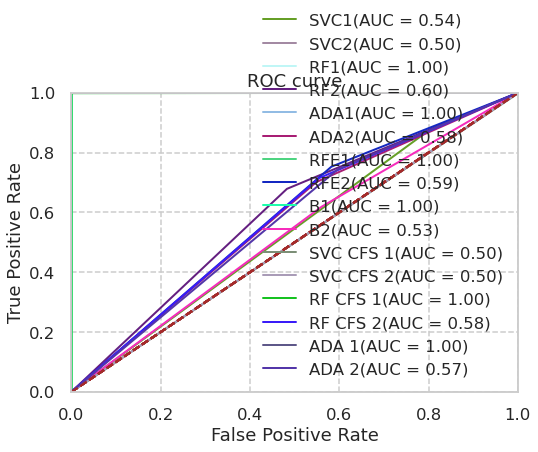

<Figure size 720000x720000 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt
plotAUC(y_test_SVC1, y_pred_SVC1, 'SVC1')
plotAUC(y_test_SVC2, y_pred_SVC2, 'SVC2')
plotAUC(y_test_RF1, y_pred_RF1, 'RF1')
plotAUC(y_test_RF2, y_pred_RF2, 'RF2')
plotAUC(y_test_ADA1, y_pred_ADA1, 'ADA1')
plotAUC(y_test_ADA2, y_pred_ADA2, 'ADA2')
plotAUC(y_test_RFE1, y_pred_RFE1, 'RFE1')
plotAUC(y_test_RFE2, y_pred_RFE2, 'RFE2')
plotAUC(y_test_B1, y_pred_B1, 'B1')
plotAUC(y_test_B2, y_pred_B2, 'B2')
plotAUC(y_test_SVCCFS1, y_pred_SVCCFS1, 'SVC CFS 1')
plotAUC(y_test_SVCCFS2, y_pred_SVCCFS2, 'SVC CFS 2')
plotAUC(y_test_RFCFS1, y_pred_RFCFS1, 'RF CFS 1')
plotAUC(y_test_RFCFS2, y_pred_RFCFS2, 'RF CFS 2')
plotAUC(y_test_ADACFS1, y_pred_ADACFS1, 'ADA 1')
plotAUC(y_test_ADACFS2, y_pred_ADACFS2, 'ADA 2')


plt.show()
plt.figure(figsize=(10000,10000))
plt.show()

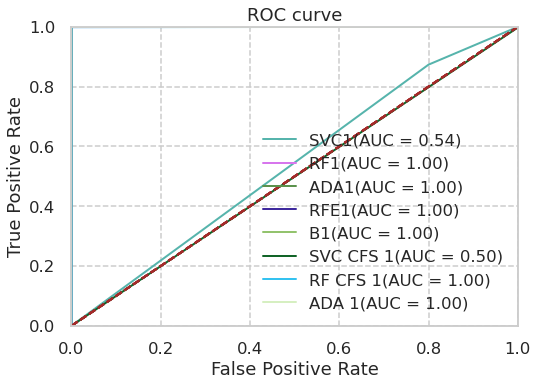

<Figure size 360000x360000 with 0 Axes>

In [67]:
import matplotlib.pyplot as plt
plotAUC(y_test_SVC1, y_pred_SVC1, 'SVC1')
plotAUC(y_test_RF1, y_pred_RF1, 'RF1')
plotAUC(y_test_ADA1, y_pred_ADA1, 'ADA1')
plotAUC(y_test_RFE1, y_pred_RFE1, 'RFE1')
plotAUC(y_test_B1, y_pred_B1, 'B1')
plotAUC(y_test_SVCCFS1, y_pred_SVCCFS1, 'SVC CFS 1')
plotAUC(y_test_RFCFS1, y_pred_RFCFS1, 'RF CFS 1')
plotAUC(y_test_ADACFS1, y_pred_ADACFS1, 'ADA 1')


plt.show()
plt.figure(figsize=(5000,5000))
plt.show()

In [68]:
list1 = [SVC1,SVC2,RF1,RF2,ADA1,ADA2]
list2 = [RFE1,RFE2,B1,B2]
list3 = [RFECV1,RFECV2]
list4 = [SVC_CFS1,SVC_CFS2,RF_CFS1,RF_CFS2,ADA_CFS1,ADA_CFS2]
label = ['SVC1','SVC2','RF1','RF2','ADA1','ADA2','RFE1','RFE2','B1','B2','SVCCFS1','SVCCFS2','RFCFS1','RFCFS2','ADACFS1','ADACFS2']
accuracies = [SVC1,SVC2,RF1,RF2,ADA1,ADA2,RFE1,RFE2,B1,B2,SVC_CFS1,SVC_CFS2,RF_CFS1,RF_CFS2,ADA_CFS1,ADA_CFS2]

In [80]:
RFECV1 = np.mean(scores1)
RFECV2 = np.mean(scores2)

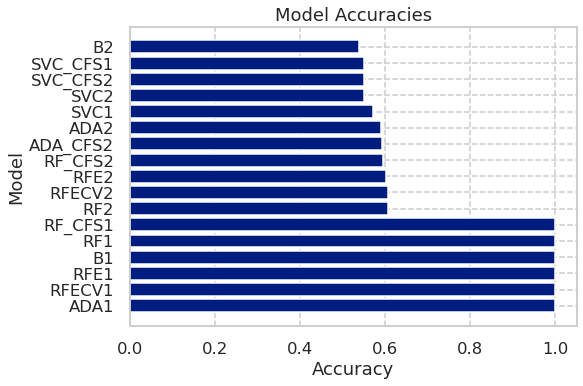

In [83]:
import matplotlib.pyplot as plt

# Create a dictionary with the model names and accuracies
accuracies = {'SVC1': SVC1, 'SVC2': SVC2, 'RF1': RF1, 'RF2': RF2, 'ADA1': ADA1, 'ADA2': ADA2,
             'RFE1': RFE1, 'RFE2': RFE2, 'B1': B1, 'B2': B2, 'RFECV1':RFECV1, 'RFECV2':RFECV2,
              'SVC_CFS1': SVC_CFS1, 'SVC_CFS2': SVC_CFS2,'RF_CFS1': RF_CFS1, 'RF_CFS2': RF_CFS2, 'ADA_CFS1': ADA_CFS1, 'ADA_CFS2': ADA_CFS2}

# Sort the values in the dictionary in descending order
sorted_accuracies = sorted(accuracies.values(), reverse=True)

# Extract the keys and values from the dictionary
labels = []
heights = []
for value in sorted_accuracies:
    # Get the key corresponding to the value
    label = [key for key, val in accuracies.items() if val == value][0]
    labels.append(label)
    heights.append(value)

# Create a bar plot
plt.barh(labels, heights)

# Add labels and a title
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Show the plot
plt.show()

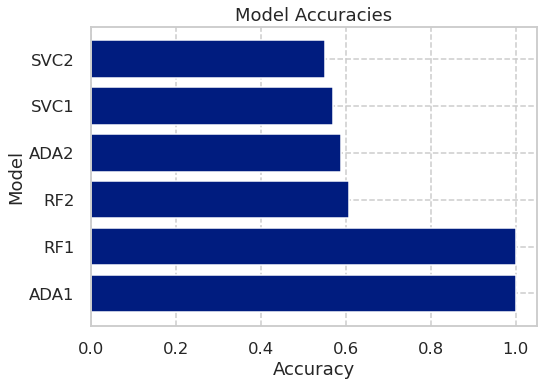

In [70]:
import matplotlib.pyplot as plt

# Create a dictionary with the model names and accuracies
accuracies = {'SVC1': SVC1, 'SVC2': SVC2, 'RF1': RF1, 'RF2': RF2, 'ADA1': ADA1, 'ADA2': ADA2}

# Sort the values in the dictionary in descending order
sorted_accuracies = sorted(accuracies.values(), reverse=True)

# Extract the keys and values from the dictionary
labels = []
heights = []
for value in sorted_accuracies:
    # Get the key corresponding to the value
    label = [key for key, val in accuracies.items() if val == value][0]
    labels.append(label)
    heights.append(value)

# Create a bar plot
plt.barh(labels, heights)

# Add labels and a title
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Show the plot
plt.show()

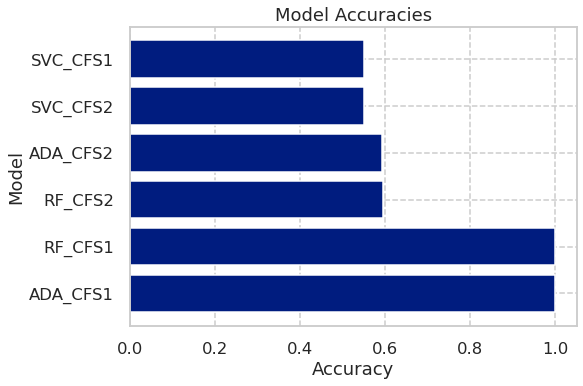

In [85]:
import matplotlib.pyplot as plt

# Create a dictionary with the model names and accuracies
accuracies = {'SVC_CFS1': SVC_CFS1, 'SVC_CFS2': SVC_CFS2,
             'RF_CFS1': RF_CFS1, 'RF_CFS2': RF_CFS2, 
              'ADA_CFS1': ADA_CFS1, 'ADA_CFS2': ADA_CFS2}

# Sort the values in the dictionary in descending order
sorted_accuracies = sorted(accuracies.values(), reverse=True)

# Extract the keys and values from the dictionary
labels = []
heights = []
for value in sorted_accuracies:
    # Get the key corresponding to the value
    label = [key for key, val in accuracies.items() if val == value][0]
    labels.append(label)
    heights.append(value)

# Create a bar plot
plt.barh(labels, heights)

# Add labels and a title
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Show the plot
plt.show()

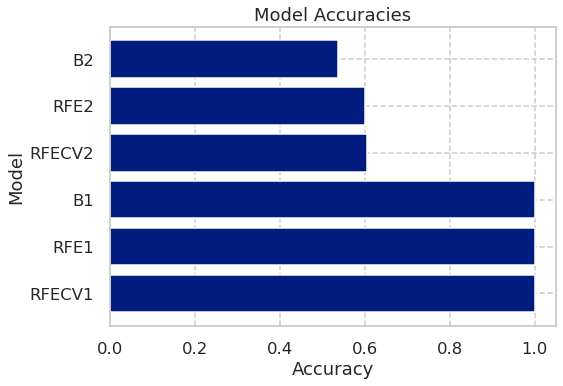

In [86]:
import matplotlib.pyplot as plt

# Create a dictionary with the model names and accuracies
accuracies = {'RFE1': RFE1, 'RFE2': RFE2, 'RFECV1':RFECV1, 'RFECV2':RFECV2,
              'B1': B1, 'B2': B2}

# Sort the values in the dictionary in descending order
sorted_accuracies = sorted(accuracies.values(), reverse=True)

# Extract the keys and values from the dictionary
labels = []
heights = []
for value in sorted_accuracies:
    # Get the key corresponding to the value
    label = [key for key, val in accuracies.items() if val == value][0]
    labels.append(label)
    heights.append(value)

# Create a bar plot
plt.barh(labels, heights)

# Add labels and a title
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Show the plot
plt.show()

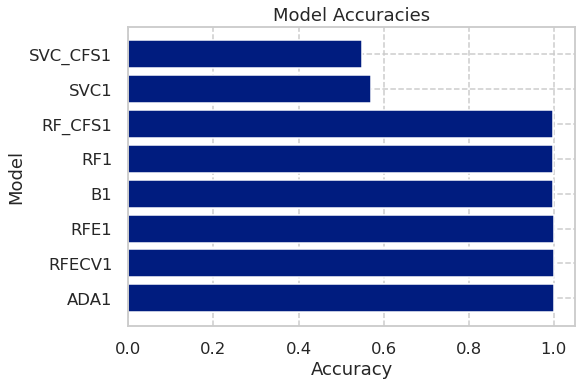

In [87]:
import matplotlib.pyplot as plt

# Create a dictionary with the model names and accuracies
accuracies = {'SVC1': SVC1, 'RF1': RF1, 'ADA1': ADA1,
             'RFE1': RFE1,'RFECV1':RFECV1, 'B1': B1, 'SVC_CFS1': SVC_CFS1,
             'RF_CFS1': RF_CFS1, 'ADA_CFS1': ADA_CFS1}

# Sort the values in the dictionary in descending order
sorted_accuracies = sorted(accuracies.values(), reverse=True)

# Extract the keys and values from the dictionary
labels = []
heights = []
for value in sorted_accuracies:
    # Get the key corresponding to the value
    label = [key for key, val in accuracies.items() if val == value][0]
    labels.append(label)
    heights.append(value)

# Create a bar plot
plt.barh(labels, heights)

# Add labels and a title
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Show the plot
plt.show()

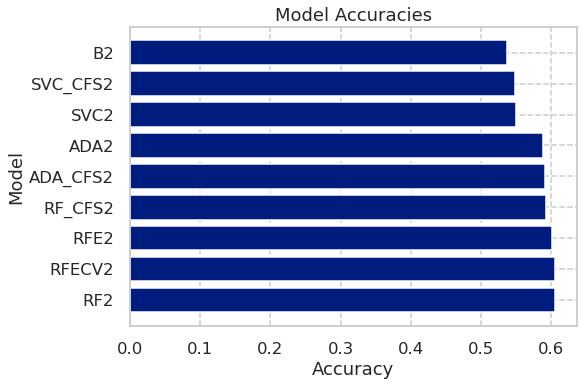

In [88]:
import matplotlib.pyplot as plt

# Create a dictionary with the model names and accuracies
accuracies = {'SVC2': SVC2, 'RF2': RF2, 'ADA2': ADA2,
             'RFE2': RFE2,'RFECV2':RFECV2, 'B2': B2, 'SVC_CFS2': SVC_CFS2,
             'RF_CFS2': RF_CFS2, 'ADA_CFS2': ADA_CFS2}

# Sort the values in the dictionary in descending order
sorted_accuracies = sorted(accuracies.values(), reverse=True)

# Extract the keys and values from the dictionary
labels = []
heights = []
for value in sorted_accuracies:
    # Get the key corresponding to the value
    label = [key for key, val in accuracies.items() if val == value][0]
    labels.append(label)
    heights.append(value)

# Create a bar plot
plt.barh(labels, heights)

# Add labels and a title
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')

# Show the plot
plt.show()

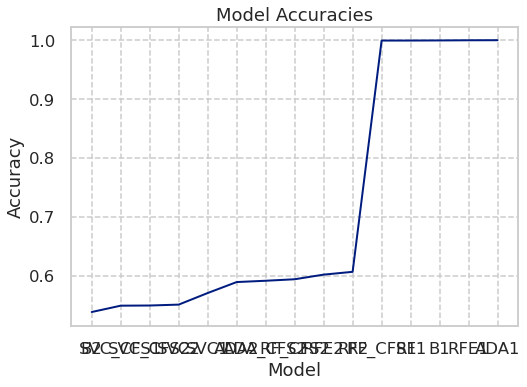

In [75]:
accuracies = {'SVC1': SVC1, 'SVC2': SVC2, 'RF1': RF1, 'RF2': RF2, 'ADA1': ADA1, 'ADA2': ADA2,
             'RFE1': RFE1, 'RFE2': RFE2, 'B1': B1, 'B2': B2, 'SVC_CFS1': SVC_CFS1, 'SVC_CFS2': SVC_CFS2,
             'RF_CFS1': RF_CFS1, 'RF_CFS2': RF_CFS2, 'ADA_CFS1': ADA_CFS1, 'ADA_CFS2': ADA_CFS2}
sorted_accuracies = sorted(accuracies.values())

labels = []
heights = []
for value in sorted_accuracies:
    # Get the key corresponding to the value
    label = [key for key, val in accuracies.items() if val == value][0]
    labels.append(label)
    heights.append(value)

# Extract the keys and values from the dictionary
#x = list(accuracies.keys())
#y = list(accuracies.values())

# Create a line plot
plt.plot(labels, heights)

# Add labels and a title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')

# Show the plot
plt.show()

In [89]:
# Import the required libraries
import pandas as pd
from IPython.display import display, HTML

# Define the dictionary
label = ['SVC1','SVC2','RF1','RF2','ADA1','ADA2','RFE1','RFE2','RFECV1','RFECV2','B1','B2','SVCCFS1','SVCCFS2','RFCFS1','RFCFS2','ADACFS1','ADACFS2']
accuracies = [SVC1,SVC2,RF1,RF2,ADA1,ADA2,RFE1,RFE2,RFECV1,RFECV2,B1,B2,SVC_CFS1,SVC_CFS2,RF_CFS1,RF_CFS2,ADA_CFS1,ADA_CFS2]

data = ({"Accuracy":accuracies,
         "Model":label})
#print(acc_list)

# Convert the dictionary to a dataframe
df = pd.DataFrame(data)

# Convert the dataframe to an HTML table
table = df.to_html()

# Display the table
display(HTML(table))

,Accuracy,Model
0,0.570377,SVC1
1,0.550674,SVC2
2,0.999434,RF1
3,0.606387,RF2
4,1.000000,ADA1
5,0.589005,ADA2
6,0.999887,RFE1
7,0.601631,RFE2
8,0.999932,RFECV1
9,0.605413,RFECV2


In [77]:
list1 = [feature_names1]
list2 = [feature_names2]
list3 = [feature_names3]
list4 = [feature_names4]
list5 = [feature_names5]
list6 = [feature_names6]
list7 = [best_subset1]
list8 = [best_subset2]

# Iterate over the elements of list1
for element in list1:
  # Check if the element is present in all four lists
  if element in list2 and element in list3 and element in list4 and element in list5 and element in list6 and element in list7 and element in list8:
    # Print the element if it is present in all four lists
    print(element)
    
element

C:\Users\Shree\AppData\Local\Temp/ipykernel_36276/303764436.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if element in list2 and element in list3 and element in list4 and element in list5 and element in list6 and element in list7 and element in list8:


array(['Revenue Growth', 'Net Income', 'Net Income Com',
       'Weighted Average Shs Out (Dil)', 'Profit Margin', 'EBIT',
       'Consolidated Income', 'Earnings Before Tax Margin',
       'Total non-current assets', 'Total assets', 'Total liabilities',
       'Other Liabilities', 'Operating Cash Flow', 'Financing Cash Flow',
       'Effect of forex changes on cash',
       'Net cash flow / Change in cash', 'priceToOperatingCashFlowsRatio',
       'pretaxProfitMargin', 'effectiveTaxRate',
       'operatingCashFlowPerShare', 'Net Income per Share',
       'Operating Cash Flow per Share', 'POCF ratio', 'Current ratio',
       'Tangible Asset Value', 'Operating Income Growth',
       'Weighted Average Shares Growth', 'Free Cash Flow growth',
       'Book Value per Share Growth', '2015 PRICE VAR [%]'], dtype=object)

In [78]:
data = (element)
#print(acc_list)

# Convert the dictionary to a dataframe
df = pd.DataFrame(data)

# Convert the dataframe to an HTML table
table = df.to_html()

# Display the table
display(HTML(table))

,0
0,Revenue Growth
1,Net Income
2,Net Income Com
3,Weighted Average Shs Out (Dil)
4,Profit Margin
5,EBIT
6,Consolidated Income
7,Earnings Before Tax Margin
8,Total non-current assets
9,Total assets


In [93]:
from scipy.stats import ttest_ind

# Define the accuracy scores for each model
list1 = [SVC1,RF1,ADA1,RFE1,RFECV1,B1,SVC_CFS1,RF_CFS1,ADA_CFS1]
list2 = [SVC2,RF2,ADA2,RFE2,RFECV2,B2,SVC_CFS2,RF_CFS2,ADA_CFS2]

# Perform the t-test
t_stat, p_value = ttest_ind(list1, list2)

# Print the results
print(f't-statistic: {t_stat:.3f}')
print(f'p-value: {p_value:.3f}')

# Interpret the results
if p_value < 0.05:
    print('There is a significant difference between the means of the two models')
else:
    print('There is not a significant difference between the means of the two models')

t-statistic: 4.919
p-value: 0.000
There is a significant difference between the means of the two models
